In [1]:
import os
os.chdir("../")
os.getcwd()

'/home/adam/Workspace/personal/unihack/fast-form'

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import json
import cv2
from preprocessing.preprocess import preprocess
from IPython.display import Image

import PIL.Image

from structure_parser.formstructureparser import FormStructureParser
from field_recognizer.recognize_all import recognize

from field_recognizer.model import load_model, load_result_mapper

Using TensorFlow backend.


In [4]:
from main import process_document, output_data
image_path = "test/example_forms/unihack/scan1.jpg"
with open("test/example_forms/unihack/config.json", 'r') as f:
    config = json.load(f) 

fsp = FormStructureParser(config)
model_structure_path = "model_data/model.json"
model_weights_path = "model_data/model.h5"
result_mapper_path = "model_data/emnist-balanced-mapping.txt"

# load model
model = load_model(model_structure_path, model_weights_path)

# load result mapper
result_mapper = load_result_mapper(result_mapper_path)

im = cv2.imread(image_path)

# process

# im = preprocess(im, config)
# form_data = fsp.process_form(im)
form_data = process_document(im, config, model, result_mapper)
filename = output_data(form_data, image_path)

Loaded model from disk


<IPython.core.display.Javascript object>


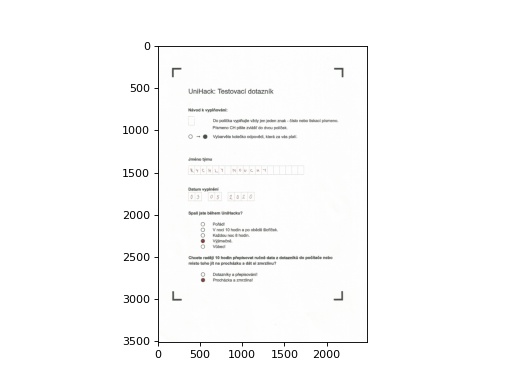

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# img=mpimg.imread(image_path)
imgplot = plt.imshow(im)
plt.show()

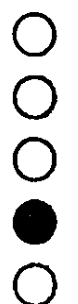

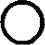

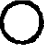

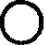

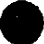

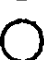

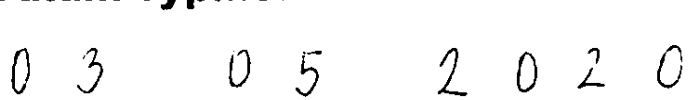

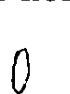

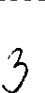

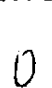

nothing


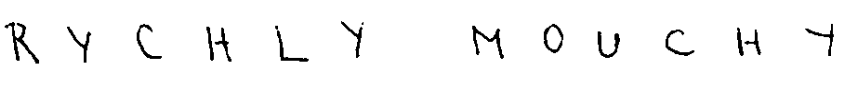

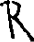

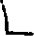

nothing


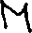

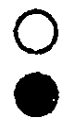

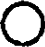

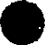

In [6]:
for field in form_data["fields"]:
    display(PIL.Image.fromarray(field["img"]))
    for img in field["box_data"]:
        if len(img)>0:
            display(PIL.Image.fromarray(img))
        else:
            print("nothing")

'False' with accuracy 0.9
box_type:boxes


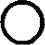

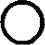

'False' with accuracy 0.9
box_type:boxes


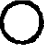

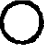

'False' with accuracy 0.9
box_type:boxes


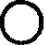

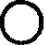

'True' with accuracy 0.9
box_type:boxes


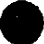

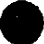

'False' with accuracy 0.9
box_type:boxes


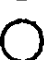

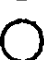

'J' with accuracy 0.5
box_type:letters


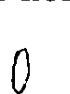

'J' with accuracy 0.5
box_type:letters


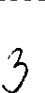

'T' with accuracy 0.5
box_type:letters


'J' with accuracy 0.5
box_type:letters


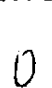

'S' with accuracy 0.5
box_type:letters


' ' with accuracy 1.0
box_type:letters
nothing
'Z' with accuracy 0.5
box_type:letters


'D' with accuracy 0.5
box_type:letters


'Z' with accuracy 0.5
box_type:letters


'O' with accuracy 0.5
box_type:letters


'R' with accuracy 0.5
box_type:letters


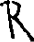

'Y' with accuracy 0.5
box_type:letters


'C' with accuracy 0.5
box_type:letters


'H' with accuracy 0.5
box_type:letters


'L' with accuracy 0.5
box_type:letters


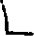

'Y' with accuracy 0.5
box_type:letters


' ' with accuracy 1.0
box_type:letters
nothing
'M' with accuracy 0.5
box_type:letters


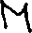

'O' with accuracy 0.5
box_type:letters


'U' with accuracy 0.5
box_type:letters


'C' with accuracy 0.5
box_type:letters


'H' with accuracy 0.5
box_type:letters


'Y' with accuracy 0.5
box_type:letters


'False' with accuracy 0.9
box_type:boxes


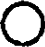

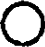

'True' with accuracy 0.9
box_type:boxes


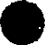

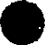

In [7]:
l=[]

for field in form_data["fields"]:
#     print(field)
    for img, val, acc, new_img in list(zip(field["box_data"],
                                   field["recognized"],
                                   field["accuracy"],
                                   field["box_data_transf"])):
        print(f"'{val}' with accuracy {acc}")
        print("box_type:{}".format(field["type"]))

        if len(img)>0:
            display(PIL.Image.fromarray(img))
            display(PIL.Image.fromarray(new_img))
            if field["type"] == "letters":
                l.append(new_img)
        else:
            print("nothing")

In [8]:
for img in l[9:]:
    display(PIL.Image.fromarray(img))

In [9]:
l = l[9:]

In [10]:
import pickle
with open("./test/example_forms/julinka_dotaznik/example_letters.pickle", "wb") as fp:   #Pickling
    pickle.dump(l, fp)
with open("./test/example_forms/julinka_dotaznik/example_letters.pickle", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

In [36]:
# from overall_processing.process_one_document import process_document 
from main import process_document
image_path = "test/example_forms/julinka_dotaznik/front_page.jpg"
with open("test/example_forms/julinka_dotaznik/front_page_config.json", 'r') as f:
    config = json.load(f)
im = cv2.imread(image_path)

form_data = process_document(im, config)

TypeError: process_document() missing 2 required positional arguments: 'model' and 'result_mapper'